## Written by Faryal Ahmed

In [ ]:
# Check is Link to Drive is OK
google = !if [ -d '/content/drive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/drive/')
!if [ -d '/content/drive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

In [ ]:
import torch

In [ ]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
!pip install --upgrade pip > /dev/null
!pip install --upgrade scikit-image
!pip install --upgrade opencv-python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import numpy as np
import os

In [ ]:
cd /content/drive/My Drive/AIcity2020/AIC20_track4/train-data/

/content/drive/My Drive/AIcity2020/AIC20_track4/train-data


In [ ]:
# Make a temporarty directory in Google colab
!mkdir -p /content/CarCrashDetection/Sources/frames > /dev/null

# Recomended to download and copy mp4 video in your Google Drive.
# Directory tree structure in Google drive
#      / ──┐
#          └─ /CarCrashDetection ──┐
#                                  ├─ videofile
#                                  └─ /frames 

# copy video stored in Google Drive /CarCrashDetection/Sources/   to Colab
!cp 1.mp4 /content/CarCrashDetection/Sources/

In [ ]:
INPUT_VIDEOS_PATH = '/content/CarCrashDetection/Sources'              # Path to folder with videos 
OUTPUT_FRAMES_PATH = '/content/CarCrashDetection/Sources/frames'      # Location of extracted images

frame_name = 'frame'                                                  # Frame name                                                        # Extract one frame each 70


!if [ -d {OUTPUT_FRAMES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FRAMES_PATH} ; else mkdir {OUTPUT_FRAMES_PATH} && echo "Output directory created"; fi

files = !ls {INPUT_VIDEOS_PATH}/*.mp4                                 # Video file names in INPUT VIDEOS PATH
print(files)
videofile = files[0]                                                  # Refactor of variable 'files' to convert the first video of list 

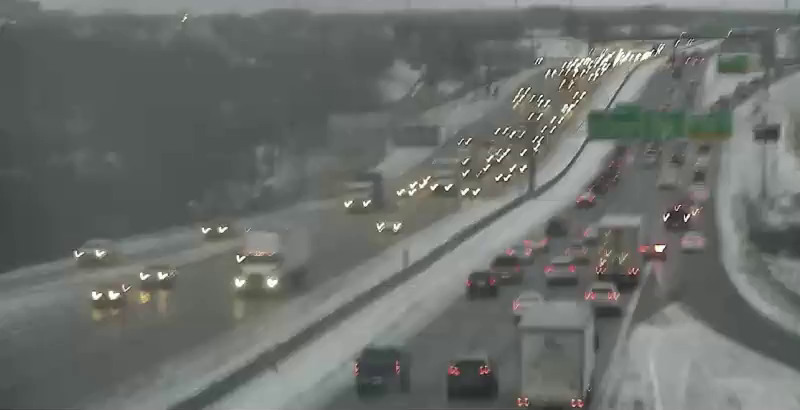

In [ ]:
vidcap = cv2.VideoCapture(videofile)
success,image = vidcap.read()
cv2_imshow(image)

In [ ]:
vidcap = cv2.VideoCapture(videofile)   
def frame_extraction(start,end):  
    frame_no= 1
    success = True

    while success:
        success,image = vidcap.read()
        frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT) 
        fps = int(vidcap.get(cv2.CAP_PROP_FPS)) 
        seconds = float(frames / fps)
        time_milli = vidcap.get(cv2.CAP_PROP_POS_MSEC)
        c = vidcap.get(cv2.CAP_PROP_POS_MSEC)
        c1 = float(c/1000)
      
        if (c1>= start and c1 < end):
              cv2.imwrite(os.path.join(OUTPUT_FRAMES_PATH,frame_name+ str(j) +".jpg"), image)     # save frame as JPEG file
              j += 1
              cv2.waitKey()
              
        if(c1 > end):
          break
              
        if not success:
                    break     
    vidcap.release()
    cv2.destroyAllWindows() 

frame_extraction(780,811)


In [ ]:
cd /content/drive/My Drive/AIcity2020/AIC20_track4/train-data/frames/LaneChangeWithoutSignal/video_1

In [ ]:
!ls

time111-120  time2-11	  time29-35    time49-56    time655-666  time780-810
time121-135  time219-225  time358-375  time535-540  time685-690  time83-87
time140-146  time22-26	  time400-405  time570-573  time705-711
time160-169  time240-246  time428-450  time577-583  time722-732
time176-180  time264-278  time460-463  time600-618  time740-746
time197-203  time284-292  time483-486  time630-642  time77-80


In [ ]:
!cp /content/CarCrashDetection/Sources/frames/* time780-810/